# Logistic Regression
Logistic Regression is used when the dependent variable(target) is **categorical**.

The hypothesis function is $h_{\Theta}(x) = \Theta^Tx$.
- if $h_{\Theta} \geq 0.5$, predict $y = 1$

- if $h_{\Theta} \leq 0.5$, predict $y = 0$

Since we want $0 \leq h_{\Theta} \leq 1$: $h_{\Theta}(x) = g(\Theta^Tx)$. 

The function $g(z) = \frac{1}{1+e^{-z}}$ is called the **sigmoid function** or **logistic function**

We can interpret $h_{\Theta}(x)$ as the estimate probability that $y=1$ on input $x$, that is, $P(y=1|x;\Theta)$.

## Why not Linear Regression?
Src: https://jinglescode.github.io/2019/05/07/why-linear-regression-is-not-suitable-for-classification/

## Decision boundary
A decision boundary is the region of a problem space in which the output label of a classifier is ambiguous.

## Cost function
Src: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
\+ http://neuralnetworksanddeeplearning.com/chap3.html

We want to minimize the cost function $J(\Theta) = \frac{1}{2m}\sum_{i=1}^m (h_{\Theta}(x^i) - y^i)^2 $.

This time, we cannot use the same loss function as before (Mean Squared Error), since the **prediction function is non-linear** (due to the sigmoid transformation). Squaring this prediction as we do in MSE results in a non-convex function with many local minimums (which means gradient descent may not find the optimal global minimum)

### Cross-Entropy
$J(\Theta) = \frac{1}{m}\sum_{i=1}^m Cost(h_{\Theta}(x^i),y^i)$, where

- $Cost(h_{\Theta}(x^i),y^i) = -log(h_{\Theta}(x))$, when $y = 1$

- $Cost(h_{\Theta}(x^i),y^i) = -log(1 - h_{\Theta}(x))$, when $y = 0$

![logistic](img/logistic_function.png)

Cost = 0 if $y = 1$ and $h_{\Theta}(x) = 1$, but as $h_{\Theta}(x) -> 0$, $Cost -> \infty $  

The cost function **penalizes confident and wrong** predictions more than it rewards confident and right predictions.

### Simpllified Cost Function
$Cost(h_{\Theta}(x^i),y^i) = -ylog(h_{\Theta}(x)) -(1-y)log(1 - h_{\Theta}(x))$

### Log Loss
Log-loss = $- \frac{1}{n}\sum_{i=1}^n[y_ilog(\hat{y_i}) + (1-y_i)log(1 - \hat{y_i})]$

Derivative = $-\frac{1}{n}(y_i-\hat{y_i})x_i$

The derivative is proportional to the difference between the label and the predicted value. If the prediction is good, the derivative is low (nice!).

## Gradient Descent

To minimize the cost, we can use gradient descent.

### The algorithm
$\Theta_j = \Theta_j - \alpha\frac{\delta}{\delta \Theta_j}J(\Theta)$

### Replacing the Cost Function
$\Theta_j = \Theta_j - \alpha\sum_{i=1}^m(h_{\Theta}(x^i) - y^i)*x^i_j$

## Multiclass classification

### One vs All (One vs Rest)
Train a logistic regression classifier $h_{\Theta}^i(x)$ for each class $i$ to predict the probability that $y = i$. We train a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. While testing, you simply classify the sample as belonging to the class with maximum score among the N classifiers.

## Regularization
Regularization is extremely important in logistic regression modeling. Without regularization, **the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions**. Consequently, most logistic regression models use one of the following two strategies to dampen model complexity:

- L2 regularization.
- Early stopping, that is, limiting the number of training steps or the learning rate.


# Our Dataset

In [19]:
import pandas as pd
df = pd.read_csv('voice.csv')
df["label"] = [1 if x =='female' else 0 for x in df.label ]
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,1
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,1
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,1


In [25]:
X = df.iloc[:, 0:20].values
y = df.iloc[:, -1].values

Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

**StandardScaler** transforms the data such that its distribution will have a mean value 0 and standard deviation of 1.

$z = \frac{(x - \mu)}{s}$, where $x$ is the sample, $\mu$ is the mean of the training samples and $s$ is the standard deviation.

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression: hard-coded

We can think of logistic regression as a **one layer neural network**.

### Initialize parameters

In [32]:
import numpy as np
def init(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Forward propagation

$z^{(i)} = w^Tx^{(i)} + b$

$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$

$Cost(a^{(i)},y^{(i)}) = -y^{(i)}log(a^{(i)}) -(1-y^{(i)})log(1 - a^{(i)})$

$J = \frac{1}{m}\sum_{i=1}^m Cost(a^{(i)},y^{(i)})$

In [34]:
def forward_backward_prop(w,b,X_train,y_train):
    m = X_train.shape[1]
    # Forward propagation
    z = np.dot(w.T,X_train) + b
    y_head = sigmoid(z) #compute activation
    loss = -(y_train*np.log(y_head)+(1-y_train)*np.log(1-y_head))
    cost = np.sum(loss)/m
    
    # Backward propagation
    weight = (np.dot(X_train,(y_head-y_train).T))/m
    bias = np.sum(y_head-y_train)/m
    
    grad = {"weight":weight,"bias":bias}
    
    return cost,grad

### Updating weights and bias

In [35]:
def update(w,b,X_train,y_train,learning_rate,num):
    cost_list=[]
    index=[]
    for i in range(num):
        cost , grad = forward_backward_prop(w,b,X_train,y_train)
        w = w - learning_rate*grad["weight"]    
        b = b - learning_rate*grad["bias"]
        if i % 100 == 0:
            cost_list.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters={"weight":w,"bias":b}
    plt.plot(index,cost_list)
    plt.xlabel("Num of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters,grad,cost_list

### Prediction Function

In [36]:
def predict(w,b,X_test):
    z = sigmoid(np.dot(w.T,X_test)+b)
    prediction = np.zeros((1,X_test.shape[1]))
    for i in range(z.shape[1]):
        if(z[0,i]<=0.5):
            prediction[0,i]=0
        else:
            prediction[0,i]=1
    return prediction

### Logistic Function

In [37]:
def logistic_regression(X_train,y_train,X_test,y_test,learning_rate,num):
    w,b = init(X_train.shape[0])
    parameters,grad,cost_list = update(w,b,X_train,y_train,learning_rate,num)
    
    prediction = predict(parameters["weight"],parameters["bias"],X_test)
    print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction - y_test)) * 100))

Cost after iteration 0: 0.686877
Cost after iteration 100: 0.197842
Cost after iteration 200: 0.148695
Cost after iteration 300: 0.129561
Cost after iteration 400: 0.119504
Cost after iteration 500: 0.113376
Cost after iteration 600: 0.109294
Cost after iteration 700: 0.106409
Cost after iteration 800: 0.104281
Cost after iteration 900: 0.102659
Cost after iteration 1000: 0.101393
Cost after iteration 1100: 0.100383
Cost after iteration 1200: 0.099565
Cost after iteration 1300: 0.098891
Cost after iteration 1400: 0.098331
Cost after iteration 1500: 0.097860
Cost after iteration 1600: 0.097460
Cost after iteration 1700: 0.097118
Cost after iteration 1800: 0.096823
Cost after iteration 1900: 0.096567
Cost after iteration 2000: 0.096344
Cost after iteration 2100: 0.096148
Cost after iteration 2200: 0.095975
Cost after iteration 2300: 0.095822
Cost after iteration 2400: 0.095685
Cost after iteration 2500: 0.095563
Cost after iteration 2600: 0.095453
Cost after iteration 2700: 0.095355
Cost

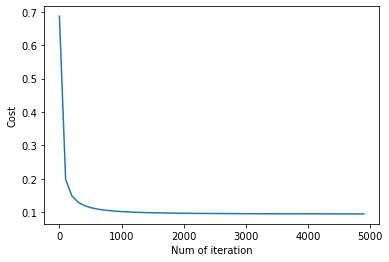

test accuracy: 97.6010101010101 %


In [39]:
logistic_regression(X_train.T,y_train.T,X_test.T,y_test.T,learning_rate=0.1,num=5000)

## Logistic Regression: sklearn

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
print("test accuracy {}".format(classifier.score(X_test,y_test)))

test accuracy 0.9785353535353535


### Predicting the Test set results

In [41]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[414,   5],
       [ 12, 361]], dtype=int64)

In [44]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,1
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,1
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,1
